In [161]:
import math
import skimage
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1. Diberikan citra girl-warna.bmp, Tampilkan hasil transformasi citra tersebut ke model warna:
- a. YCbCr
- b. HSI
- c. YIQ
- d. YUV
- (tampilkan citra untuk masing-masing komponen) 

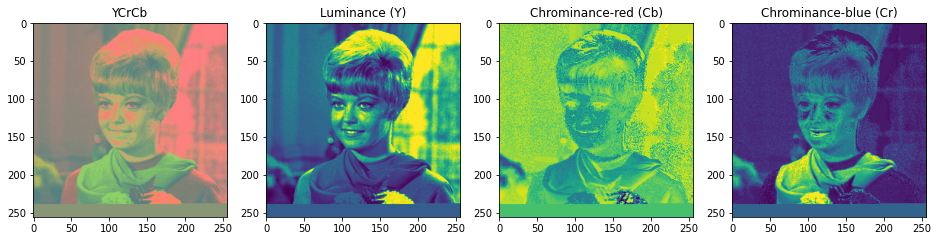

In [162]:
#a) Model warna = YCbCr

#read img
img = cv.imread('girl-warna.bmp')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#transform img from RGB to YCbCr
YCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
Y = YCrCb[:,:,0]
Cr = YCrCb[:,:,1]
Cb = YCrCb[:,:,2]

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(YCrCb)
ax[0].set_title('YCrCb')
ax[1].imshow(Y)
ax[1].set_title("Luminance (Y)")
ax[2].imshow(Cb)
ax[2].set_title("Chrominance-red (Cb)")
ax[3].imshow(Cr)
ax[3].set_title("Chrominance-blue (Cr)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


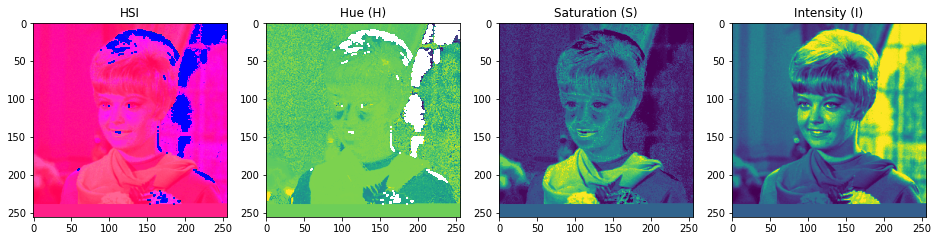

In [163]:
#b) Model warna = HSI

from skimage.color import rgb2hsv

#read img
img = cv.imread('girl-warna.bmp')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

with np.errstate(divide='ignore', invalid='ignore'):

    #Load image with 32 bit floats as variable type
    bgr = np.float32(img)/255

    #Separate color channels
    blue = bgr[:,:,0]
    green = bgr[:,:,1]
    red = bgr[:,:,2]


    #Calculate Intensity
    intensity = np.divide(blue + green + red, 3)

    #Calculate Saturation
    minimum = np.minimum(np.minimum(red, green), blue)
    saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

    #Calculate Hue
    hue = np.copy(red)

    #transform RGB to HSI
    for i in range(0, blue.shape[0]):
        for j in range(0, blue.shape[1]):
            hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
            math.sqrt((red[i][j] - green[i][j])**2 +
                      ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
            hue[i][j] = math.acos(hue[i][j])
            if blue[i][j] <= green[i][j]:
                hue[i][j] = hue[i][j]
            else:
                hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

    #Merge channels into picture and return image
    hsi = cv.merge((hue, saturation, intensity))

    
#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(hsi)
ax[0].set_title('HSI')
ax[1].imshow(hue)
ax[1].set_title("Hue (H)")
ax[2].imshow(saturation)
ax[2].set_title("Saturation (S)")
ax[3].imshow(intensity)
ax[3].set_title("Intensity (I)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


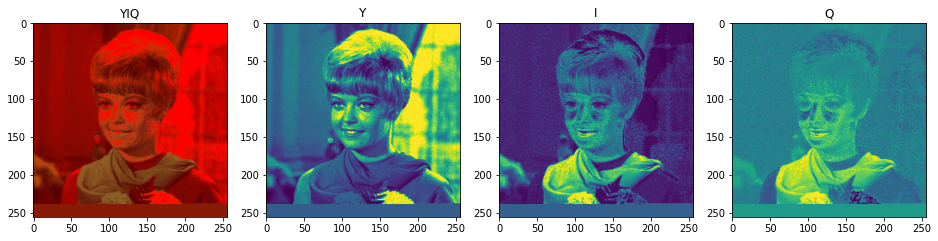

In [164]:
#c) Model warna = YIQ

#read img
img = cv.imread('girl-warna.bmp')
RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#transform img from RGB to YQI
YIQ = skimage.color.rgb2yiq(RGB)
Y = YIQ[:,:,0]
I = YIQ[:,:,1]
Q = YIQ[:,:,2]

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(YIQ)
ax[0].set_title('YIQ')
ax[1].imshow(Y)
ax[1].set_title("Y")
ax[2].imshow(I)
ax[2].set_title("I")
ax[3].imshow(Q)
ax[3].set_title("Q")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


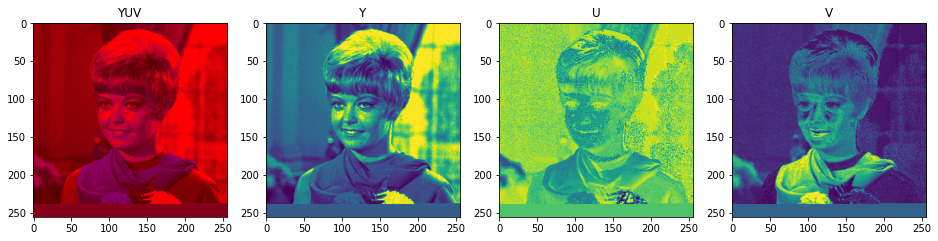

In [165]:
#d) Model warna = YUV

#read img
img = cv.imread('girl-warna.bmp')
RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)


#transform img from RGB to YUV
YUV = skimage.color.rgb2yuv(RGB)
Y = YUV[:,:,0]
U = YUV[:,:,1]
V = YUV[:,:,2]

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(YUV)
ax[0].set_title('YUV')
ax[1].imshow(Y)
ax[1].set_title("Y")
ax[2].imshow(U)
ax[2].set_title("U")
ax[3].imshow(V)
ax[3].set_title("V")
plt.show()

### 2. Tentukan nilai threshold dengan metode otsu dari citra montain.bmp dan tampilkan hasil thresholdnya.

Otsu's algorithm implementation thresholding result: 135.43359375


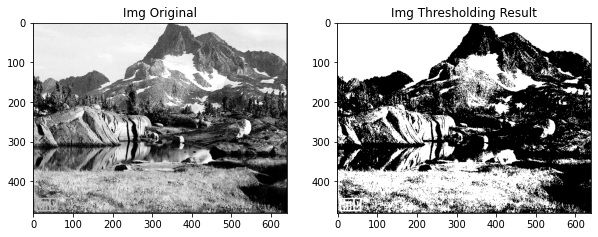

In [166]:
#read img as a grayscale img
image = cv2.imread('mountain.bmp', 0)

#Set total number of bins in the histogram
bins_num = 256
 
#Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

#Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

#Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
#Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1

#Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
#Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]

#print result of  thresholding value
print("Otsu's algorithm implementation thresholding result:", threshold)

#using the thresholding value
ret, result = cv.threshold(image, 135.43359375, 255, 0)

#show the imgs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Img Original')
ax[1].imshow(result, cmap='gray')
ax[1].set_title("Img Thresholding Result")
plt.show()

### 3. Dengan menggunakan segmentasi dan proses citra biner, proses citra coints.png sehingga seluruh background menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra tersebut.

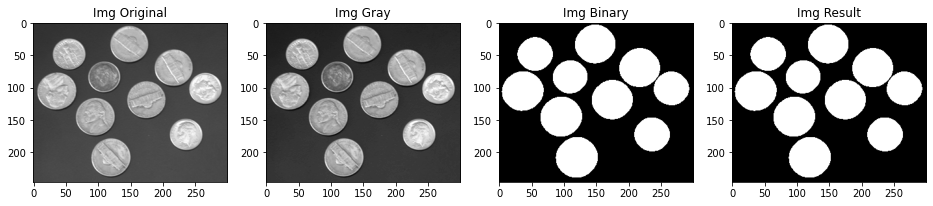

In [167]:
#read img
img = cv.imread('coints.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#transform img to binary img using Threshold
ret, binary = cv.threshold(gray, 100, 255, 0)

#find the img contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours
result = cv2.drawContours(binary, contours, -1, (255,255,255), 3)

#show imgs
fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Img Original')
ax[1].imshow(gray, cmap='gray')
ax[1].set_title('Img Gray')
ax[2].imshow(binary, cmap='gray')
ax[2].set_title('Img Binary')
ax[3].imshow(result, cmap='gray')
ax[3].set_title('Img Result')
plt.show()

### 4. Segmentasi citra peppers.tiff menggunakan K-Mean dengan nilai K = 3 berdasarkan warna.

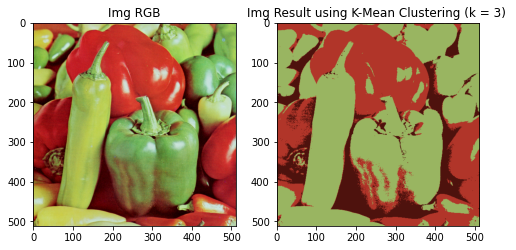

In [168]:
#read img
img = cv.imread('peppers.tiff')
img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img_RGB.reshape((-1, 3))

#convert to float
pixel_values = np.float32(pixel_values)

#define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#number of clusters (k)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert back to 8 bit values
centers = np.uint8(centers)

#flatten the labels array
labels = labels.flatten()

#convert all pixels to the color of the centroids
segmented_img= centers[labels.flatten()]

#reshape back to the original image dimension
segmented_img = segmented_img.reshape(img_RGB.shape)

#show imgs
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_RGB)
ax[0].set_title('Img RGB')
ax[1].imshow(segmented_img)
ax[1].set_title('Img Result using K-Mean Clustering (k = 3) ')
plt.show()